In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import kagglehub
path = kagglehub.dataset_download("pratik2901/animal-dataset")
print(path)

c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\marco\.cache\kagglehub\datasets\pratik2901\animal-dataset\versions\1


Busca algún banco de imágenes que nos permita crear un algoritmo de clasificación de imágenes (OpenML.org, Kaggle.org, etc...).

In [ ]:
#definir paths
animal_paths = {
    0: "./animal_dataset_intermediate/train/elefante_train/", #elefant
    1: "./animal_dataset_intermediate/train/farfalla_train/", #butterfly
    2: "./animal_dataset_intermediate/train/mucca_train/", #cow
    3: "./animal_dataset_intermediate/train/pecora_train/", #sheep
    4: "./animal_dataset_intermediate/train/scoiattolo_train/" #squirrel
}

#inicializar lista
data = []

#classify images by label
for label, path in animal_paths.items():
    for file_name in os.listdir(path):
        if file_name.lower().endswith('jpeg'):
            data.append((file_name, label))

#crear df
df = pd.DataFrame(data, columns=['file_name', 'animal'])
df.head()

,file_name,animal
0,OIP---LeldVL441fx5S66TGgVQAAAA.jpeg,0
1,OIP--3aF2OpzGKcdI6FHil50qQHaFj.jpeg,0
2,OIP--5G8OlqvrOTIOSdkhbgOYAHaFj.jpeg,0
3,OIP--dFiPOerHYSGQMsd2OLrewHaEE.jpeg,0
4,OIP--dvs2pKao65g77QKsRzJyQHaHB.jpeg,0


In [4]:
#clasificacion binaria 1,0
df['sheep'] = df['animal'].apply(lambda x:1 if x == 3 else 0)
df.head()

,file_name,animal,sheep
0,OIP---LeldVL441fx5S66TGgVQAAAA.jpeg,0,0
1,OIP--3aF2OpzGKcdI6FHil50qQHaFj.jpeg,0,0
2,OIP--5G8OlqvrOTIOSdkhbgOYAHaFj.jpeg,0,0
3,OIP--dFiPOerHYSGQMsd2OLrewHaEE.jpeg,0,0
4,OIP--dvs2pKao65g77QKsRzJyQHaHB.jpeg,0,0


In [5]:
df_sheep = df[['file_name', 'sheep']]
df_sheep.head()

,file_name,sheep
0,OIP---LeldVL441fx5S66TGgVQAAAA.jpeg,0
1,OIP--3aF2OpzGKcdI6FHil50qQHaFj.jpeg,0
2,OIP--5G8OlqvrOTIOSdkhbgOYAHaFj.jpeg,0
3,OIP--dFiPOerHYSGQMsd2OLrewHaEE.jpeg,0
4,OIP--dvs2pKao65g77QKsRzJyQHaHB.jpeg,0


In [6]:
from PIL import Image
from sklearn.model_selection import train_test_split

#procesar imagenes
def preprocess_image(file_name):
    #conseguir el path de la imagen
    animal_label = df[df['file_name'] == file_name]['animal'].values[0]
    image_folder = animal_paths[animal_label]
    file_path = os.path.join(image_folder, file_name)
    
    img = Image.open(file_path).convert('RGB') 
    img = img.resize((80, 80))
    img_array = np.array(img)
    return img_array.flatten()

x = np.array([preprocess_image(file) for file in df_sheep['file_name']])
y = df_sheep['sheep'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (6023, 19200), y_train shape: (6023,)
x_test shape: (1506, 19200), y_test shape: (1506,)


Importa los datos y crea un algoritmo de clasificación de las imagenes usando el algoritmo SGDClassifier (clasificador de descenso de gradiente estocástico).

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

#normalizar
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#entrenar modelo
model = SGDClassifier(loss='log_loss', random_state=42)  #regresion logistica (log)
model.fit(x_train_scaled, y_train)

SGDClassifier(loss='log_loss', random_state=42)

Evalúa con validación cruzada el rendimiento del modelo que has construido e interpreta el resultado obtenido.

In [9]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, x, y, cv=3, scoring='accuracy')

#mostrar resultados
print("precision:", cv_scores)
print("mean precision:", cv_scores.mean())
print("deviation:", cv_scores.std())

precision: [0.75258964 0.67211155 0.79314468]
mean precision: 0.7392819581247219
deviation: 0.050299603613539454


In [31]:
#filtrar y obtener imagen sheep
sheep_example = df_sheep[df_sheep['sheep'] == 1].iloc[0] #tomar la primera fila que sea 'sheep'

#filtrar y obtener imagen nonsheep
non_sheep_example = df_sheep[df_sheep['sheep'] == 0].iloc[0] #tomar la primera fila que no sea 'sheep'

In [32]:
sheep_image = preprocess_image(sheep_example['file_name'])
non_sheep_image = preprocess_image(non_sheep_example['file_name'])

#normalizar las caracteristicas de la imagen
sheep_image_scaled = scaler.transform([sheep_image])
non_sheep_image_scaled = scaler.transform([sheep_image])

In [33]:
#predecir para 'sheep' y 'nonsheep'
sheep_prediction = model.predict(sheep_image_scaled)
non_sheep_prediction = model.predict(non_sheep_image_scaled)

# Mostrar los resultados
print(f"prediccion sheep(imagen): {sheep_prediction[0]} (1)")
print(f"prediccion nonsheep (imagen): {non_sheep_prediction[0]} (0)")

prediccion sheep(imagen): 1 (1)
prediccion nonsheep (imagen): 1 (0)


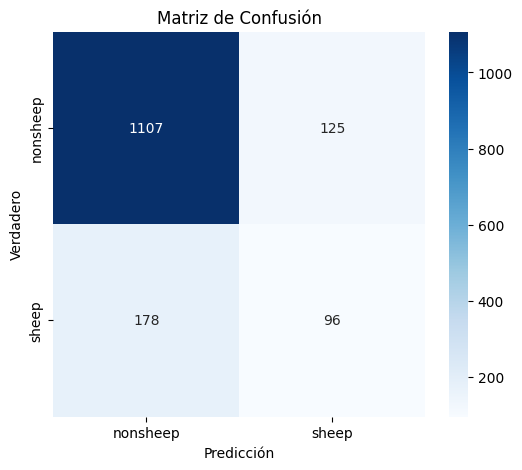

Matriz de Confusión:
[[1107  125]
 [ 178   96]]


In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(x_test_scaled)

#calcular matriz de confusion
cm = confusion_matrix(y_test, y_pred)

#mostrar matriz de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["nonsheep", "sheep"], yticklabels=["nonsheep", "sheep"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

print("Matriz de Confusión:")
print(cm)

Viendo el resultado vemos que falla bastante y puede deverse a motivos que saltan a la vista como la resolucion de las imagenes que se usa para entrenar el modelo o porque la cantidad de no ovejas es muy superior a la cantidad de ovejas en el dataset